## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import Dropout
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4, drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [11]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.25
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio,drp_ratio=Dropout_EXP)
    model.summary()
    optimizer= keras.optimizers.rmsprop(lr=regulizer_ratio)
    model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
    
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(x_test,y_test),shuffle=True)
    
     # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



W0727 14:07:08.384442 4348421568 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0727 14:07:08.533313 4348421568 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128

W0727 14:07:08.670398 4348421568 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 135us/step - loss: 4.6023 - acc: 0.1063 - val_loss: 2.8875 - val_acc: 0.1041
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 3.6144 - acc: 0.1040 - val_loss: 2.5844 - val_acc: 0.1060
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.6989 - acc: 0.1001 - val_loss: 2.7362 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.7363 - acc: 0.0998 - val_loss: 2.7368 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.7366 - acc: 0.0985 - val_loss: 2.7361 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.7365 - acc: 0.0983 - val_loss: 2.7363 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.7365 - acc: 0.0975 - val_loss: 2.7363 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.2117 - acc: 0.2314 - val_loss: 2.0071 - val_acc: 0.3345
Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.0356 - acc: 0.3074 - val_loss: 1.9084 - val_acc: 0.3549
Epoch 3/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.9527 - acc: 0.3376 - val_loss: 1.8378 - val_acc: 0.3784
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8994 - acc: 0.3538 - val_loss: 1.7942 - val_acc: 0.3986loss: 1.
Epoch 5/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.8547 - acc: 0.3735 - val_loss: 1.8413 - val_acc: 0.3833
Epoch 6/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.8201 - acc: 0.3872 - val_loss: 1.7930 - val_acc: 0.4062
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.7870 - acc: 0.3986 - val_loss: 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.5241 - acc: 0.0972 - val_loss: 2.3865 - val_acc: 0.0872
Epoch 2/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.5184 - acc: 0.0989 - val_loss: 2.3836 - val_acc: 0.0870
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.5138 - acc: 0.0978 - val_loss: 2.3809 - val_acc: 0.0884
Epoch 4/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.5150 - acc: 0.0972 - val_loss: 2.3782 - val_acc: 0.0888
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.5109 - acc: 0.0984 - val_loss: 2.3755 - val_acc: 0.0891
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.5070 - acc: 0.0971 - val_loss: 2.3729 - val_acc: 0.0898
Epoch 7/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.5024 - acc: 0.0983 - val_loss: 2.3704 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.5224 - acc: 0.0992 - val_loss: 2.4026 - val_acc: 0.1062
Epoch 2/50
50000/50000 [==============================] - 7s 139us/step - loss: 2.5174 - acc: 0.0977 - val_loss: 2.4026 - val_acc: 0.1062
Epoch 3/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.5206 - acc: 0.0991 - val_loss: 2.4026 - val_acc: 0.1062
Epoch 4/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.5192 - acc: 0.0996 - val_loss: 2.4026 - val_acc: 0.1062
Epoch 5/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.5185 - acc: 0.0992 - val_loss: 2.4026 - val_acc: 0.1062
Epoch 6/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.5160 - acc: 0.1019 - val_loss: 2.4026 - val_acc: 0.1062
Epoch 7/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.5171 - acc: 0.0993 - val_loss: 2.4026 - 

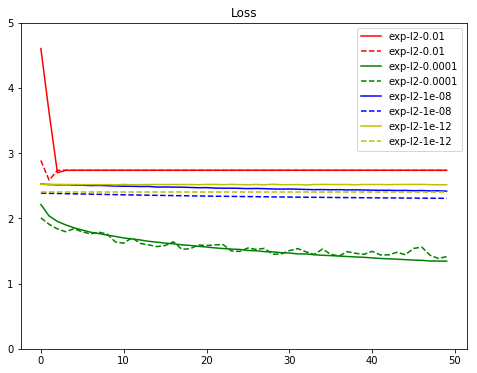

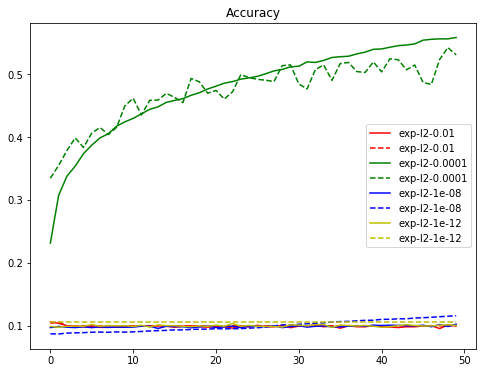

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()